In [239]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [240]:
train = pd.read_csv("train_data.csv")

In [241]:
test = pd.read_csv("test_data.csv")

In [242]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [243]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [244]:
for col in train.columns:
  missing_data = train[col].isna().sum()
  missing_percent = missing_data/len(train)*100;
  print(f"Column: {col} has {missing_percent}%" )

Column: Loan_ID has 0.0%
Column: Gender has 2.1172638436482085%
Column: Married has 0.4885993485342019%
Column: Dependents has 2.44299674267101%
Column: Education has 0.0%
Column: Self_Employed has 5.211726384364821%
Column: ApplicantIncome has 0.0%
Column: CoapplicantIncome has 0.0%
Column: LoanAmount has 3.5830618892508146%
Column: Loan_Amount_Term has 2.2801302931596092%
Column: Credit_History has 8.143322475570033%
Column: Property_Area has 0.0%
Column: Loan_Status has 0.0%


In [245]:
train_ori = train.copy()
test_ori = test.copy()

In [246]:
train.columns
  


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [247]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [248]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [249]:
train.shape

(614, 13)

In [250]:
test.shape

(367, 12)

In [251]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [252]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

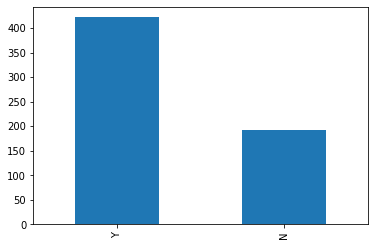

In [253]:
train['Loan_Status'].value_counts().plot.bar()

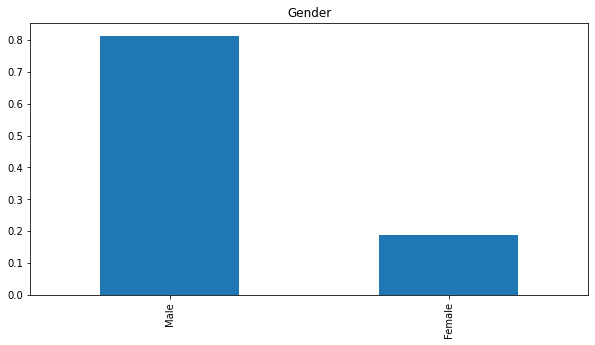

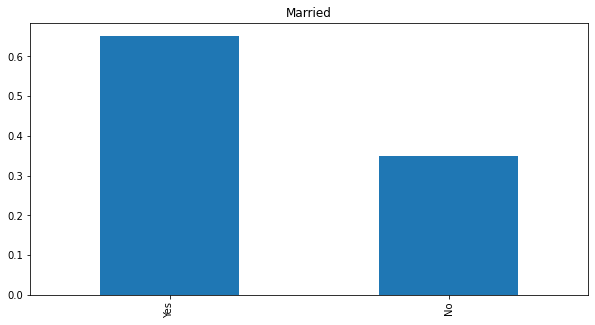

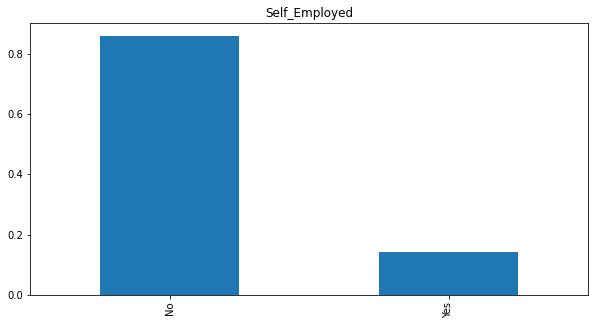

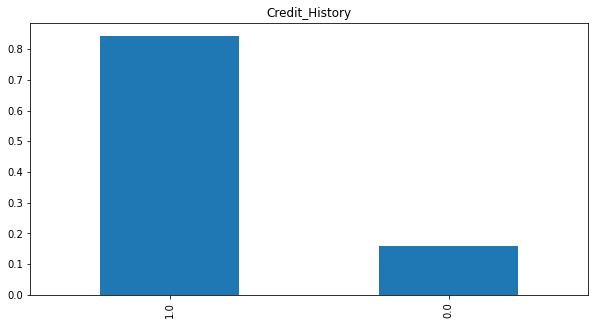

In [254]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize = (10,5), title = 'Gender')
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(figsize = (10,5) ,title = 'Married')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize = (10,5) ,title = 'Self_Employed')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize = (10,5) ,title = 'Credit_History')
plt.show()

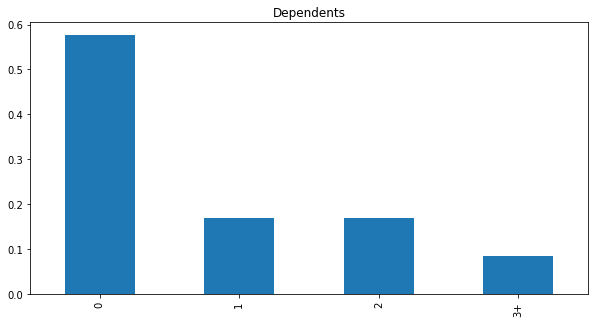

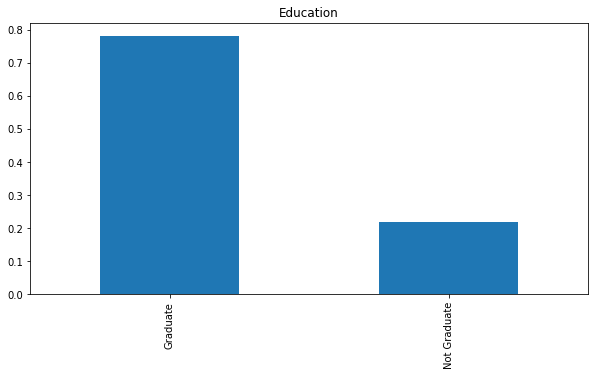

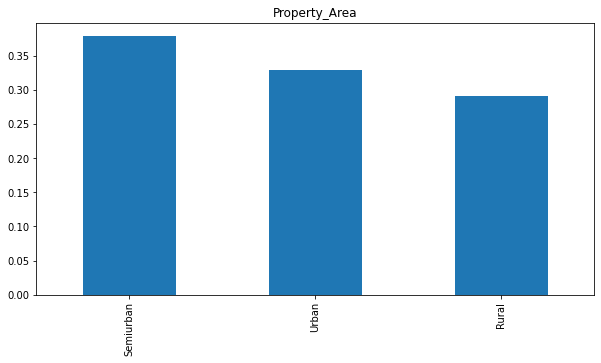

In [255]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize = (10,5) ,title = 'Dependents')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(figsize = (10,5) ,title = 'Education')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize = (10,5) ,title = 'Property_Area')
plt.show()

**Người nộp đơn**

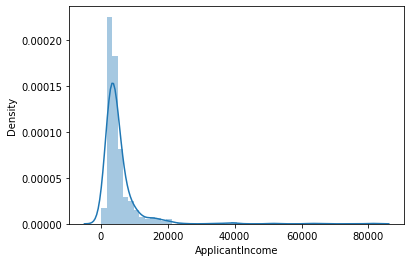

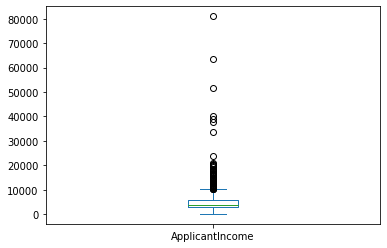

In [256]:
sns.distplot(train['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box()
plt.show()

Text(0.5, 0.98, '')

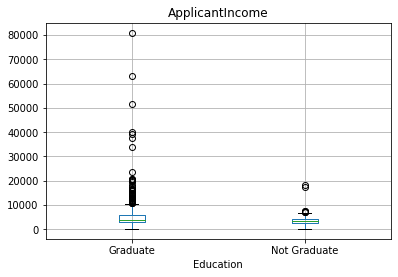

In [257]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

**Thu nhập có được**

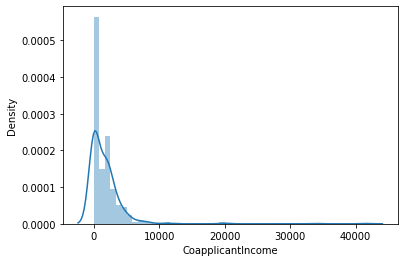

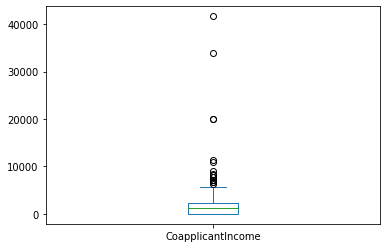

In [258]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box()
plt.show()

**Số tiền muốn vay**

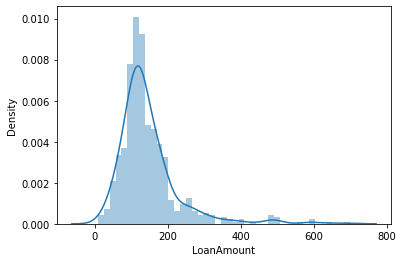

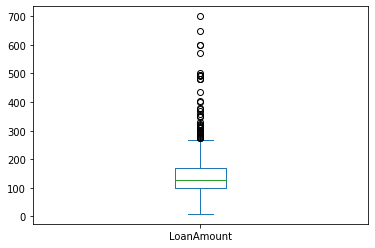

In [259]:
train.notna()
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box()
plt.show()


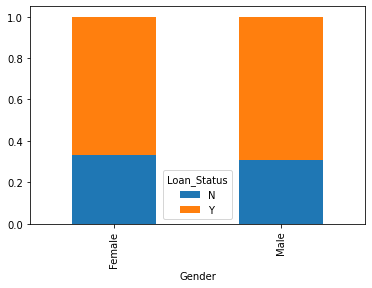

In [260]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.show()

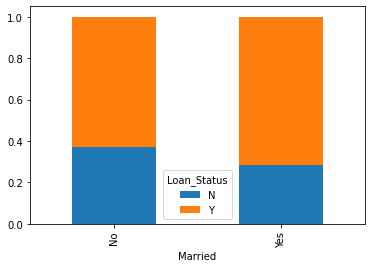

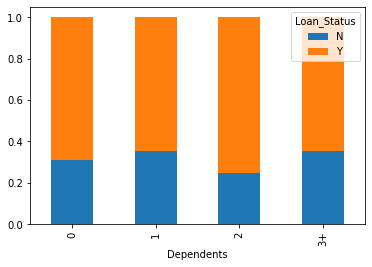

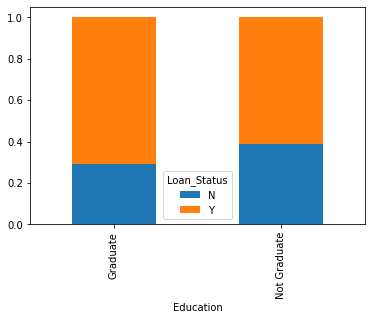

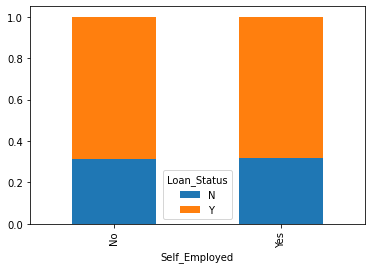

In [261]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.show()
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.show()

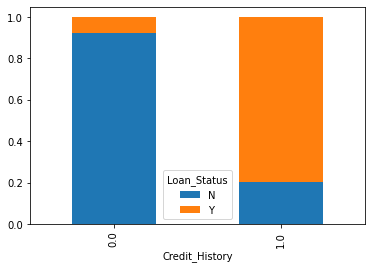

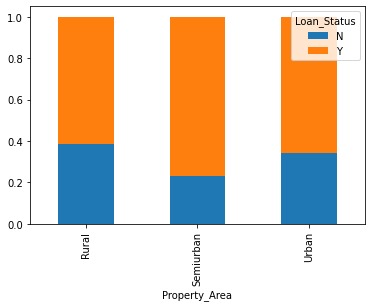

In [262]:
Credit_History=pd.crosstab(train["Credit_History"],train["Loan_Status"])
Property_Area=pd.crosstab(train["Property_Area"],train["Loan_Status"])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

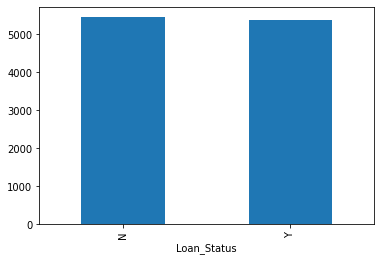

In [263]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

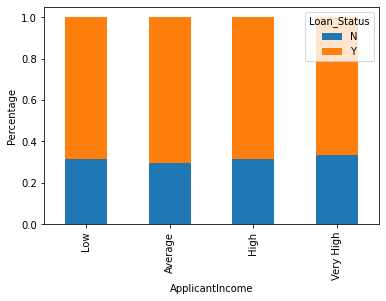

In [264]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low','Average','High','Very High']
train["Income_bin"] = pd.cut(train['ApplicantIncome'], bins, labels=group)
Income_bin = pd.crosstab(train["Income_bin"], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("ApplicantIncome")
P = plt.ylabel("Percentage")

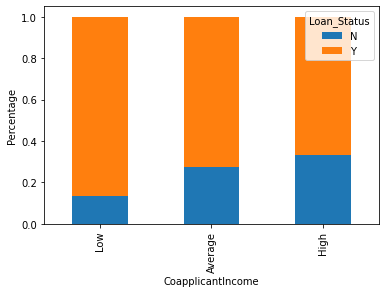

In [265]:
bins = [0, 1000, 3000, 42000]
group = ['Low','Average','High']
train["Coapplicant_Income_bin"] = pd.cut(train['CoapplicantIncome'], bins, labels=group)
Coapplicant_Income_bin = pd.crosstab(train["Coapplicant_Income_bin"], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("CoapplicantIncome")
P = plt.ylabel("Percentage")

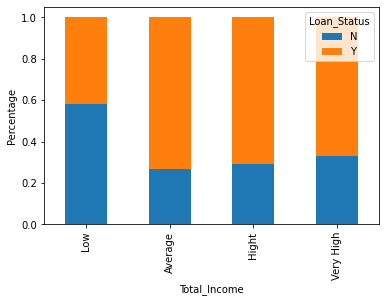

In [266]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'Hight', 'Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

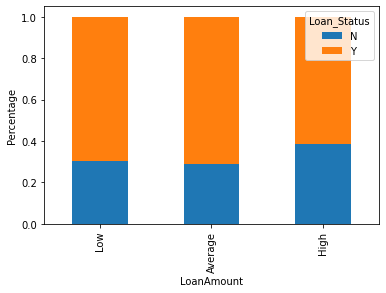

In [267]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

In [268]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,Hight,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,Hight,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,Hight,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Average,NaN,2900.0,Average,Low
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,High,NaN,4106.0,Hight,Low
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Very High,Low,8312.0,Very High,High
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,Very High,NaN,7583.0,Very High,Average


In [269]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis = 1)
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)

<AxesSubplot:>

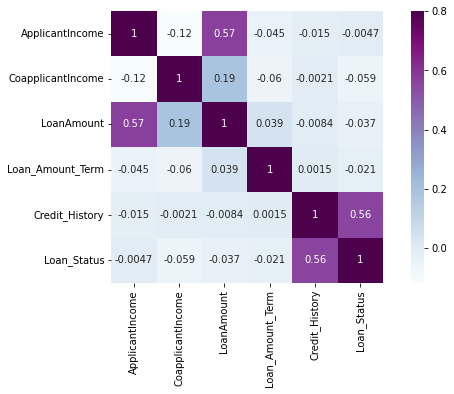

In [270]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(matrix, vmax = .8, square=True, cmap = 'BuPu', annot = True)

In [271]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [272]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [273]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [274]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [275]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [276]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [277]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

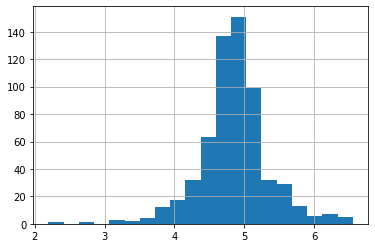

In [278]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

**Trainning 1**

In [279]:
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis= 1)

In [280]:
x = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [281]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,4.262680
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,5.231109


In [282]:
# tự động chuyển 'male'/'female' thành 0 hoặc 1
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [283]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,4.262680,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,3.688879,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,5.533389,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,5.231109,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


In [284]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size = 0.2)

**Hồi quy**

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

LogisticRegression()

In [286]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv, pred_cv)

0.8292682926829268

In [287]:
pred_test = model.predict(test)

In [288]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [289]:
submission = pd.read_csv('submission.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [290]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_ori['Loan_ID']

In [291]:
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [292]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('rs.csv')

In [293]:
submission.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


**K-Fold**

In [294]:
from sklearn.model_selection import StratifiedKFold

In [295]:
i = 1
mean = 0
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
for train_index, test_index in kf.split(x,y):
  print('\n{} of kfold {}'.format(i, kf.n_splits))
  xtr, xvl = x.loc[train_index], x.loc[test_index]
  ytr, yvl = y.loc[train_index], y.loc[test_index]
  model = LogisticRegression(random_state= 1)
  model.fit(xtr,ytr)
  pred_test = model.predict(xvl)
  scope = accuracy_score(yvl, pred_test)
  mean+=scope
  print('accuracy_scope', scope)
  i+=1;
  pred_test = model.predict(test)
  pred = model.predict_proba(xvl)[:, -1]
print('\nMean Validation Accuracy', mean/(i-1));




1 of kfold 5
accuracy_scope 0.8048780487804879

2 of kfold 5
accuracy_scope 0.8373983739837398

3 of kfold 5
accuracy_scope 0.7804878048780488

4 of kfold 5
accuracy_scope 0.7886178861788617

5 of kfold 5
accuracy_scope 0.7950819672131147

Mean Validation Accuracy 0.8012928162068507


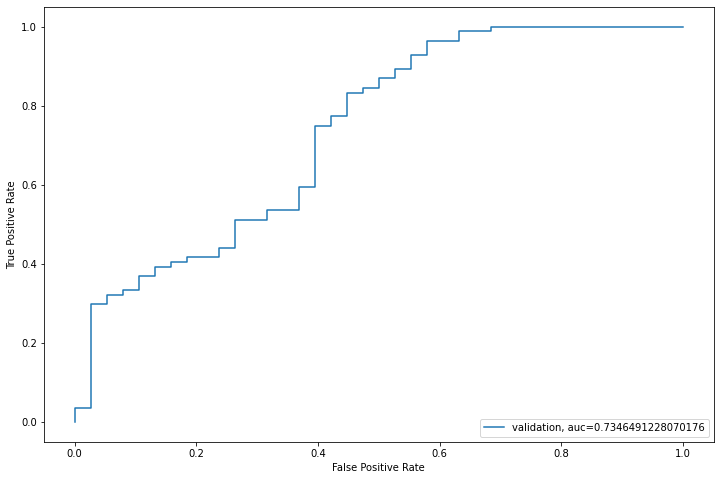

In [296]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label ='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

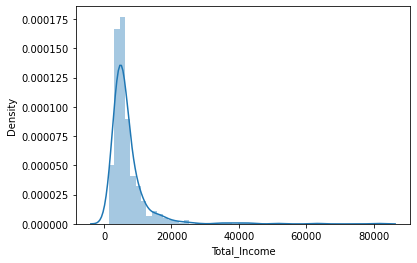

In [299]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
sns.distplot(train['Total_Income'])

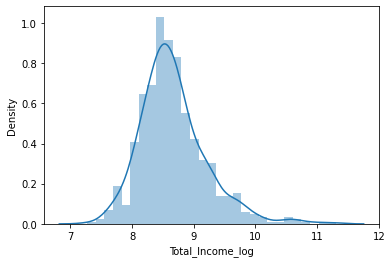

In [300]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

<AxesSubplot:xlabel='EMI', ylabel='Density'>

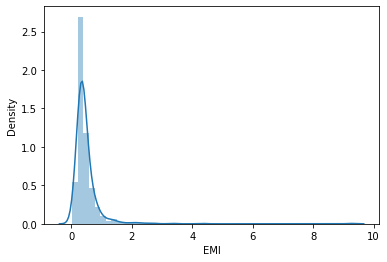

In [301]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI'])

In [302]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income'], axis=1)

In [303]:
train

,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income_log,EMI
0,1.0,1,4.852030,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,8.674026,0.355556
1,1.0,0,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,8.714568,0.355556
2,1.0,1,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,8.006368,0.183333
3,1.0,1,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,8.505323,0.333333
4,1.0,1,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,8.699515,0.391667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,1,4.262680,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,7.972466,0.197222
610,1.0,1,3.688879,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,8.320205,0.222222
611,1.0,1,5.533389,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,9.025456,0.702778
612,1.0,1,5.231109,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,8.933664,0.519444


In [304]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.2)

In [305]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=5)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8048780487804879

2 of kfold 5 
accuracy_score 0.8373983739837398

3 of kfold 5 
accuracy_score 0.7886178861788617

4 of kfold 5 
accuracy_score 0.8048780487804879

5 of kfold 5 
accuracy_score 0.7950819672131147

 Mean Validation Accuracy 0.8061708649873383


In [306]:
params = {
    'n_estimators' : [10, 20],
    'max_depth' : [2,3,4,5,6,7,8,9,10]
}

In [307]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(SVC(gamma = 'auto'),{
    'C' : [1, 10, 20],
    'kernel' : ['rbf', 'linear']
}, cv = 5, return_train_score=False)
gs.fit(x_train, y_train)
gs.cv_results_

{'mean_fit_time': array([0.00800104, 0.00396605, 0.00795684, 0.19341688, 0.00820069,
        0.62620921]),
 'std_fit_time': array([0.00062254, 0.0006083 , 0.00086843, 0.03777365, 0.00097718,
        0.11908052]),
 'mean_score_time': array([0.00359998, 0.00222931, 0.00284228, 0.00218287, 0.0030005 ,
        0.00218835]),
 'std_score_time': array([4.90804913e-04, 7.69065412e-04, 4.26897094e-04, 4.00363922e-04,
        7.12229366e-06, 4.22651915e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [308]:
df = pd.DataFrame(gs.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008001,0.000623,0.003600,0.000491,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.767677,0.77551,0.836735,0.826531,0.867347,0.814760,0.037800,2
1,0.003966,0.000608,0.002229,0.000769,1,linear,"{'C': 1, 'kernel': 'linear'}",0.767677,0.77551,0.836735,0.826531,0.867347,0.814760,0.037800,2
2,0.007957,0.000868,0.002842,0.000427,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.767677,0.77551,0.836735,0.836735,0.867347,0.816801,0.038646,1
3,0.193417,0.037774,0.002183,0.000400,10,linear,"{'C': 10, 'kernel': 'linear'}",0.767677,0.77551,0.836735,0.826531,0.867347,0.814760,0.037800,2
4,0.008201,0.000977,0.003000,0.000007,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.747475,0.77551,0.826531,0.826531,0.867347,0.808679,0.042250,6
5,0.626209,0.119081,0.002188,0.000423,20,linear,"{'C': 20, 'kernel': 'linear'}",0.767677,0.77551,0.836735,0.826531,0.867347,0.814760,0.037800,2


In [309]:
df[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.814760
1,1,linear,0.814760
2,10,rbf,0.816801
3,10,linear,0.814760
4,20,rbf,0.808679
5,20,linear,0.814760


In [310]:
gs.best_score_

0.8168006596578025

In [311]:
gs.best_params_

{'C': 10, 'kernel': 'rbf'}

In [312]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }
    },
    'neural_network': {
        'model': MLPClassifier(),
        'params': {
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'solver': ['lbfgs', 'sgd', 'adam']
        }
    },     
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20],
            'max_depth' : [1,3,5,7,9,11]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
}

In [313]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []
rs = []

for model_name, mp in model_params.items():
    gs =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    gs.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })
    rs.append(round(gs.best_score_, 4))
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.816801,"{'C': 10, 'kernel': 'rbf'}"
1,decision_tree,0.741290,{'criterion': 'entropy'}
2,neural_network,0.818821,"{'activation': 'identity', 'solver': 'adam'}"
3,random_forest,0.808658,"{'max_depth': 7, 'n_estimators': 20}"
4,logistic_regression,0.818821,{'C': 1}


In [314]:
name = ["Support Vector Machine", "Decision Tree", "Neural Network", "Random Forest", "Logistic Regression"]

No handles with labels found to put in legend.


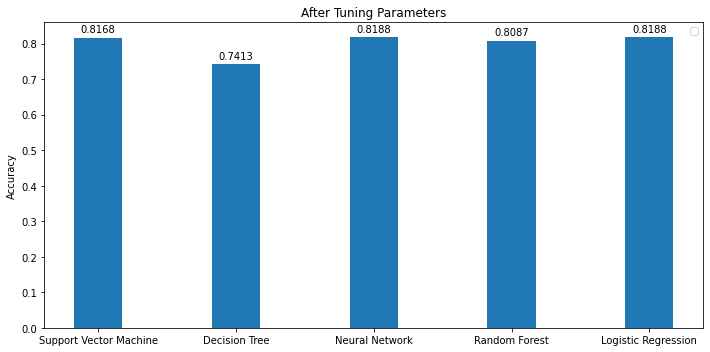

In [316]:
x = np.arange(len(name))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects2 = ax.bar(name, rs, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('After Tuning Parameters')
ax.legend()

ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()